## YELP DATASET CODE

In [13]:
#Import necessary libraries and packages
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Import primary CSV data file
business_original = pd.read_csv('business.csv')

In [97]:
#First view of data 
business_original.head(3)

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories
0,0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh..."
1,1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,..."
2,2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,NaN,"Pets, Pet Services, Pet Groomers"


In [16]:
#Determine the actual span of our data
business_original.shape

(209393, 15)

In [17]:
#Unique cities in dataset
business_original['city'].nunique()

1250

In [18]:
#Assess the data types for ease of analysis
business_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 15 columns):
Unnamed: 0      209393 non-null int64
business_id     209393 non-null object
name            209392 non-null object
address         200714 non-null object
city            209391 non-null object
state           209393 non-null object
postal_code     208884 non-null object
latitude        209393 non-null float64
longitude       209393 non-null float64
stars           209393 non-null float64
review_count    209393 non-null int64
is_open         209393 non-null int64
attributes      180348 non-null object
categories      208869 non-null object
hours           164550 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 24.0+ MB


In [19]:
#Check for duplicate records in the dataset
business_original.duplicated().sum()

0

In [20]:
#Check for Null values 
business_original.isnull().sum()

Unnamed: 0          0
business_id         0
name                1
address          8679
city                2
state               0
postal_code       509
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      29045
categories        524
hours           44843
dtype: int64

In [21]:
#check what percentage of hours is null
(business_original.hours.isnull().sum()/len(business_original))*100

21.415711126924013

In [22]:
#hours is not really useful and has a bad format so we drop it
business_original.drop('hours', axis=1, inplace=True)

In [23]:
#updated span/size of dataset
business_original.shape

(209393, 14)

In [24]:
#Analyze the state column to determine which states will be of use
business_original['state'].value_counts()

AZ     60803
NV     39084
ON     36627
OH     16392
NC     16218
PA     12376
QC     10233
AB      8682
WI      5525
IL      2034
SC      1328
CA        23
NY        22
TX         6
WA         5
AL         3
FL         3
GA         3
BC         2
CT         2
UT         2
CO         2
NE         2
MI         2
VT         2
HPL        1
AR         1
HI         1
AK         1
DOW        1
MO         1
YT         1
XWY        1
VA         1
DUR        1
MB         1
OR         1
Name: state, dtype: int64

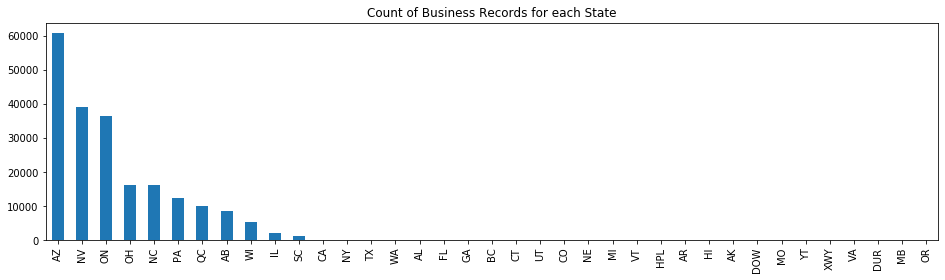

In [25]:
#Visulaize the distribution above
ax = business_original['state'].value_counts()
ax.plot.bar(figsize = (16,4), title="Count of Business Records for each State")

In [26]:
#Graph new order of states
filt = ['AZ','NV','NC','OH','PA']
state_filt= business_original['state'].isin(filt)
graph=business_original[state_filt]

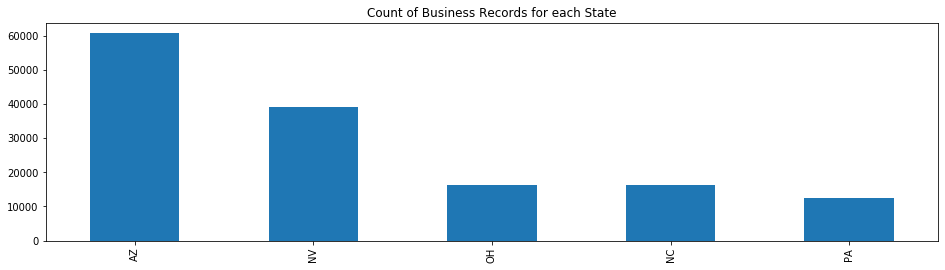

In [27]:
ax_1 = graph['state'].value_counts()
ax_1.plot.bar(figsize = (16,4), title="Count of Business Records for each State")

In [28]:
#Hence, filter needs only relevant states
filt1 = ['AZ','NV','NC','OH','PA']
state_filt1= business_original['state'].isin(filt1)
business = business_original[state_filt1]
business.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories
0,0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh..."
1,1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,..."
3,3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl..."
4,4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726649,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma..."
5,5,cKyLV5oWZJ2NudWgqs8VZw,Oasis Auto Center - Gilbert,"1720 W Elliot Rd, Ste 105",Gilbert,AZ,85233,33.350399,-111.827142,4.5,38,1,{'BusinessAcceptsCreditCards': 'True'},"Auto Repair, Automotive, Oil Change Stations, ..."


In [29]:
business['state'].value_counts()

AZ    60803
NV    39084
OH    16392
NC    16218
PA    12376
Name: state, dtype: int64

In [30]:
#How many records do we have left to work with?
business.shape

(144873, 14)

In [31]:
#Begin exploration of categories
#Check for null values
business['categories'].isnull().sum()

376

In [33]:
#Reset index and drop unneccessry columns
business=business.reset_index().drop(columns=['Unnamed: 0','index'])

In [34]:
#Filter out only records that fall into important categories
targets = ['Restaurants', 'Fast Food','Shopping','Beauty','Spa','Nightlife','Auto', 'Arts','Entertainment','Active Life']
business=business[business.categories.str.contains('|'.join(targets))]


In [35]:
#What do we have left?
business.shape

(95051, 13)

In [36]:
#CREATE FUNCTION TO SINGLE OUT AREA OF PRIMARY INTEREST FOR ANALYSIS

In [37]:
def Restaurant(x):
     if ('restaurants' in x.lower()) or ('fast food' in x.lower()) or ('restaurant' in x.lower()):
        return 1
     else:
        return 0

In [38]:
business["Restaurant"] = business["categories"].apply(Restaurant)
business[["categories","Restaurant"]].head(10)

,categories,Restaurant
0,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",0
1,"Health & Medical, Fitness & Instruction, Yoga,...",0
2,"Hardware Stores, Home Services, Building Suppl...",0
4,"Auto Repair, Automotive, Oil Change Stations, ...",0
6,"Auto Repair, Oil Change Stations, Automotive, ...",0
7,"Automotive, Auto Repair",0
9,"Beauty & Spas, Tanning",0
11,"Shopping, Shoe Stores, Fashion",0
12,"Event Planning & Services, Wedding Planning, F...",0
13,"Weight Loss Centers, Fitness & Instruction, Bo...",0


In [39]:
business["Restaurant"].sum()

35305

# Extracting Attributes

In [40]:
#Expand attributes columns by splitting and create dummy variables
business["attributes"]=business["attributes"].str.replace("{","")
business["attributes"]=business["attributes"].str.replace("}","")
business["attributes"]=business["attributes"].str.replace("'","")
business["attributes"]=business["attributes"].str.replace('"',"")
business["attributes"]=business["attributes"].astype(str)
pd.set_option('display.max_columns', 50)
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,Restaurant
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"BusinessAcceptsCreditCards: True, BikeParking:...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",0
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"GoodForKids: True, ByAppointmentOnly: True","Health & Medical, Fitness & Instruction, Yoga,...",0
2,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"BusinessAcceptsCreditCards: True, ByAppointmen...","Hardware Stores, Home Services, Building Suppl...",0
4,cKyLV5oWZJ2NudWgqs8VZw,Oasis Auto Center - Gilbert,"1720 W Elliot Rd, Ste 105",Gilbert,AZ,85233,33.350399,-111.827142,4.5,38,1,BusinessAcceptsCreditCards: True,"Auto Repair, Automotive, Oil Change Stations, ...",0
6,ScYkbYNkDgCneBrD9vqhCQ,Junction Tire & Auto Service,6910 E Southern Ave,Mesa,AZ,85209,33.393885,-111.682226,5.0,18,1,"BusinessAcceptsCreditCards: True, ByAppointmen...","Auto Repair, Oil Change Stations, Automotive, ...",0


In [41]:
#Create Parking variable
def Parking(x):
    if ('valet: True' in x) or ('garage: True' in x) or ('lot: True' in x):
        return 1
    else:
        return 0

In [42]:
business['Parking']=business['attributes'].apply(Parking)


In [43]:
#Create Kid_friendly variable
def Kid_friendly(x):
    if 'GoodForKids: True' in x:
        return 1
    else:
        return 0

In [44]:
business['Kid_friendly']=business['attributes'].apply(Kid_friendly)

In [45]:
#Create Reservations variable
def Reservations(x):
    if 'RestaurantsReservations: True' in x:
        return 1
    else:
        return 0

In [46]:
business['Reservations'] = business['attributes'].apply(Reservations)

In [47]:
#Create Price range variable
def Price_Range(x):
    if 'RestaurantsPriceRange2: 1' in x:
        return 1
    elif 'RestaurantsPriceRange2: 2' in x:
        return 2
    elif 'RestaurantsPriceRange2: 3' in x:
        return 3
    else:
        return 4

In [48]:
business['Price_Range'] = business['attributes'].apply(Price_Range)

In [49]:
#Create creditcard variable
def Credit_card(x):
    if "BusinessAcceptsCreditCards: True" in x:
        return 1
    else:
        return 0

In [50]:
business['Credit_card'] = business['attributes'].apply(Credit_card)

In [51]:
#Create wheelchair access variable
def wheelchair_access(x):
    if 'WheelchairAccessible: True' in x:
        return 1
    else:
        return 0

In [52]:
business['wheelchair_access'] = business['attributes'].apply(wheelchair_access)

In [53]:
#Create breakfast variable
def good_for_breakfast (x):
    if 'breakfast: True' in x:
        return 1
    else:
        return 0

In [54]:
business['good_for_breakfast'] = business['attributes'].apply(good_for_breakfast)

In [55]:
#Create lunch variable
def good_for_lunch (x):
    if 'lunch: True' in x:
        return 1
    else:
        return 0

In [56]:
business['good_for_lunch'] = business['attributes'].apply(good_for_lunch)

In [57]:
#Create dinner variable
def good_for_dinner (x):
    if 'dinner: True' in x:
        return 1
    else:
        return 0

In [58]:
business['good_for_dinner'] = business['attributes'].apply(good_for_dinner)

In [59]:
#Create alcohol variable
def alcohol (x):
    if ('Alcohol: ufull_bar' in x) or ('Alcohol: ubeer_and_wine' in x):
        return 1
    else:
        return 0

In [60]:
business['alcohol'] = business['attributes'].apply(alcohol)

In [61]:
#Create happyhour variable
def happyhour (x):
    if 'HappyHour: True' in x :
        return 1
    else:
        return 0

In [62]:
business['happyhour'] = business['attributes'].apply(happyhour)

In [63]:
#Create wifi variable
def wifi (x):
    if ('WiFi: ufree' in x) or ('WiFi: free' in x) or ('WiFi: yes' in x) or ('WiFi: uyes' in x) or ('WiFi: True' in x) or ('WiFi: uTrue' in x):
        return 1
    else:
        return 0

In [64]:
business['wifi'] = business['attributes'].apply(wifi)

In [65]:
#Create table service variable
def table_service (x):
    if 'RestaurantsTableService: True' in x :
        return 1
    else:
        return 0

In [66]:
business['table_service'] = business['attributes'].apply(table_service)

In [67]:
#Create Entertainment
def Entertainment (x):
    if ('HasTV: True' in x) or ('dj: True' in x) or ('background_music: True' in x) or ('jukebox: True' in x) or ('live: True' in x) or ('video: True' in x) or ('karaoke: True' in x):
        return 1
    else:
        return 0

In [68]:
business['Entertainment'] = business['attributes'].apply(Entertainment)

In [69]:
#Create takeout variable
def takeout (x):
    if 'RestaurantsTakeOut: True' in x :
        return 1
    else:
        return 0

In [70]:
business['Takeout'] = business['attributes'].apply(takeout)

In [71]:
#Create Noise_Level variable

def Noise_Level(x):
    if ('NoiseLevel: uquiet' in x) or ('NoiseLevel: quiet' in x):
        return 1
    elif ('NoiseLevel: uaverage' in x) or ('NoiseLevel: average' in x):
        return 2
    elif ('NoiseLevel: uloud' in x) or ('NoiseLevel: loud' in x):
        return 3
    else:
        return 4

In [72]:
business['Noise_Level'] = business['attributes'].apply(Noise_Level)

In [73]:
#Create Reservations variable

def Reservations (x):
    if 'RestaurantsReservations: True' in x :
        return 1
    else:
        return 0

In [74]:
business['Reservations'] = business['attributes'].apply(Reservations)

In [75]:
#Create Delivery variable

def Delivery (x):
    if 'RestaurantsDelivery: True' in x :
        return 1
    else:
        return 0

In [76]:
business['Delivery'] = business['attributes'].apply(Delivery)

# Extracting Categories

In [77]:
#Create FastFood variable
def FastFood (x):
    if 'Fast Food' in x :
        return 1
    else:
        return 0

In [78]:
business['FastFood'] = business['categories'].apply(FastFood)

In [79]:
#Create Ethnicity variable
def ethnicity (x):
    if ('american' in x.lower()) or ('burgers' in x.lower()):
        return 'American'
    elif 'chinese' in x.lower():
        return 'Chinese'
    elif ('mexican' in x.lower()) or ("tex-mex"in x.lower()):
        return 'Mexican'
    elif 'italian' in x.lower():
        return 'Italian'
    elif ('japanese' in x.lower()) or ('sushi' in x.lower()):
        return 'Japanese'
   # elif 'thai' in x.lower():
      #  return 'Thai'
   # elif 'indian' in x.lower():
      #  return 'Indian'
   # elif 'korean' in x.lower():
      #  return 'Korean'
    else: 
        return 'other'

In [80]:
business['Ethnicity'] = business['categories'].apply(ethnicity)

In [81]:
#Remove foreign symbols from name to allow for counting chains
business["name"]=business["name"].str.replace(' ',"")
business["name"]=business["name"].str.replace("'","")
business["name"]=business["name"].str.replace(',',"")
business["name"]=business["name"].str.replace('.',"")

business["name"]=business["name"].astype(str)
business["name"]=business["name"].str.lower()


In [82]:
#Select only restaurants for data analysis before chain is counted
Rest_filt= business["Restaurant"]==1
Restaurant=business[Rest_filt]
Restaurant.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,Restaurant,Parking,Kid_friendly,Reservations,Price_Range,Credit_card,wheelchair_access,good_for_breakfast,good_for_lunch,good_for_dinner,alcohol,happyhour,wifi,table_service,Entertainment,Takeout,Noise_Level,Delivery,FastFood,Ethnicity
14,CsLQLiRoafpJPJSkNX2h5Q,middleeastdeli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,3.0,5,0,"RestaurantsGoodForGroups: True, OutdoorSeating...","Food, Restaurants, Grocery, Middle Eastern",1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,4,0,0,other
21,vjTVxnsQEZ34XjYNS-XUpA,wetzelspretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,1,"GoodForKids: True, RestaurantsTakeOut: True, R...","Food, Pretzels, Bakeries, Fast Food, Restaurants",1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,4,0,1,other
24,fnZrZlqW1Z8iWgTVDfv_MA,carlsjr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.099738,-115.301568,2.5,15,0,"Alcohol: unone, WiFi: uno, GoodForKids: True, ...","Mexican, Restaurants, Fast Food",1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,2,0,1,Mexican
28,98hyK2QEUeI8v2y0AghfZA,pholeesvietnameserestaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"BusinessParking: None, Ambience: touristy: Fal...","Restaurants, Vietnamese, Soup",1,0,0,0,4,1,1,0,0,0,0,0,0,1,1,1,4,1,0,other
29,fhNf_sg-XzZ3e7HEVGuOZg,meatchixandwieners,6530 S Decatur Blvd,Las Vegas,NV,89118,36.071196,-115.207463,3.0,10,0,"RestaurantsPriceRange2: 2, BusinessParking: ga...","Burgers, Restaurants, American (Traditional), ...",1,0,0,0,2,1,0,0,0,0,0,0,0,0,1,1,3,0,0,American
30,Ga2Bt7xfqoggTypWD5VpoQ,amandosbros,2602 W Southern Ave,Tempe,AZ,85282,33.393199,-111.976270,4.0,9,0,"Caters: False, RestaurantsGoodForGroups: True,...","Mexican, Restaurants",1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,Mexican
31,xFc50drSPxXkcLvX5ygqrg,boomerssweethomechicago,"5932 W Bell Rd, Ste D-109",Glendale,AZ,85308,33.640391,-112.187028,3.5,12,0,"BusinessAcceptsCreditCards: True, BusinessPark...","Burgers, Fast Food, American (New), Restaurant...",1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,4,0,1,American
33,tLpkSwdtqqoXwU0JAGnApw,wendys,4602 Northfield Road,Cleveland,OH,44128,41.434614,-81.527026,3.5,7,1,"RestaurantsDelivery: False, BusinessAcceptsCre...","Restaurants, Fast Food, Burgers",1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,2,0,1,American
34,Sd75ucXKoZUM2BEfBHFUOg,chinagourmet,"3460 E Southern Ave, Ste 109",Mesa,AZ,85204,33.394863,-111.756036,3.0,13,0,"RestaurantsPriceRange2: 1, RestaurantsAttire: ...","Chinese, Restaurants",1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,Chinese
37,lK-wuiq8b1TuU7bfbQZgsg,hingetown,NaN,Cleveland,OH,44113,41.489343,-81.711029,3.0,4,1,"Alcohol: unone, GoodForKids: True, Restaurants...","Shopping Centers, Food, Coffee & Tea, Cafes, M...",1,0,1,0,4,0,0,0,0,0,0,0,0,0,1,0,4,0,0,other


In [84]:
#Declare chain if chain counts is 4 or more.
def Chain (x):
    if x >= 4 :
        return 1
    else:
        return 0

In [87]:
#Confirm shape of DF
Restaurant.shape

(35305, 33)

In [88]:
#Check for number of Open restaurants
Restaurant['is_open'].sum()

23867

In [89]:
#Check for number of Closed restaurants
len(Restaurant['is_open'])-(Restaurant['is_open'].sum())

11438

In [90]:
#Check again for null values
Restaurant.isnull().sum()

business_id             0
name                    0
address               395
city                    0
state                   0
postal_code            39
stars                   0
review_count            0
is_open                 0
attributes              0
categories              0
Restaurant              0
Parking                 0
Kid_friendly            0
Reservations            0
Price_Range             0
Credit_card             0
wheelchair_access       0
good_for_breakfast      0
good_for_lunch          0
good_for_dinner         0
alcohol                 0
happyhour               0
wifi                    0
table_service           0
Entertainment           0
Takeout                 0
Noise_Level             0
Delivery                0
FastFood                0
Ethnicity               0
Chain_Counts            0
Is_Chain                0
dtype: int64

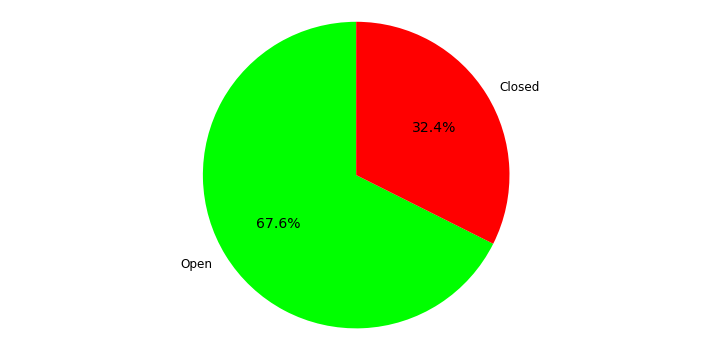

In [91]:
#Make pie chart to show distribution of open and closed businesses'

# Pie chart
labels = ["Open", 'Closed']
sizes = [23867, 11438]
#colors
colors = ['Lime','Red']
 
fig1, ax1 = plt.subplots(figsize=(10,5))
fig1.subplots_adjust(0.3,0,1,1)
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color('black')
    text.set_size(12)
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_size(14)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [92]:
Restaurant.state.value_counts()

AZ    12130
NV     8345
OH     5914
NC     4656
PA     4260
Name: state, dtype: int64

In [93]:
Restaurant.postal_code.value_counts() #Reject

89109    1022
85281     557
89119     499
85251     458
89102     433
89103     387
15222     357
89146     351
28202     338
89101     311
89123     310
85016     306
28277     303
85004     287
44113     285
85260     281
85308     278
85032     277
89014     272
85226     267
89147     256
85282     255
89052     243
89104     241
89121     240
89117     238
85018     224
85224     223
44060     219
28027     218
         ... 
15142       1
85350       1
44301       1
27262       1
44010       1
93013       1
15301       1
60616       1
28221       1
15049       1
16509       1
85010       1
28272       1
89179       1
15240       1
44307       1
15075       1
85263       1
44219       1
44210       1
29707       1
15601       1
89009       1
89199       1
15018       1
85324       1
89114       1
18104       1
85355       1
89039       1
Name: postal_code, Length: 548, dtype: int64

In [94]:
#Check for ethnicity distribution
#Looks very skewed so it may not be used. There are 600 levels. This does not seem feasible for analysis within this time frame.
Restaurant.Ethnicity.value_counts()

other       14430
American    11503
Mexican      3565
Italian      2405
Chinese      2074
Japanese     1328
Name: Ethnicity, dtype: int64

In [95]:
Restaurant.head()

,business_id,name,address,city,state,postal_code,stars,review_count,is_open,attributes,categories,Restaurant,Parking,Kid_friendly,Reservations,Price_Range,Credit_card,wheelchair_access,good_for_breakfast,good_for_lunch,good_for_dinner,alcohol,happyhour,wifi,table_service,Entertainment,Takeout,Noise_Level,Delivery,FastFood,Ethnicity,Chain_Counts,Is_Chain
14,CsLQLiRoafpJPJSkNX2h5Q,middleeastdeli,4508 E Independence Blvd,Charlotte,NC,28205,3.0,5,0,"RestaurantsGoodForGroups: True, OutdoorSeating...","Food, Restaurants, Grocery, Middle Eastern",1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,4,0,0,other,1,0
21,vjTVxnsQEZ34XjYNS-XUpA,wetzelspretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,4.0,10,1,"GoodForKids: True, RestaurantsTakeOut: True, R...","Food, Pretzels, Bakeries, Fast Food, Restaurants",1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,4,0,1,other,4,1
24,fnZrZlqW1Z8iWgTVDfv_MA,carlsjr,9595 W Tropicana Ave,Las Vegas,NV,89147,2.5,15,0,"Alcohol: unone, WiFi: uno, GoodForKids: True, ...","Mexican, Restaurants, Fast Food",1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,2,0,1,Mexican,57,1
28,98hyK2QEUeI8v2y0AghfZA,pholeesvietnameserestaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,4.5,23,1,"BusinessParking: None, Ambience: touristy: Fal...","Restaurants, Vietnamese, Soup",1,0,0,0,4,1,1,0,0,0,0,0,0,1,1,1,4,1,0,other,1,0
29,fhNf_sg-XzZ3e7HEVGuOZg,meatchixandwieners,6530 S Decatur Blvd,Las Vegas,NV,89118,3.0,10,0,"RestaurantsPriceRange2: 2, BusinessParking: ga...","Burgers, Restaurants, American (Traditional), ...",1,0,0,0,2,1,0,0,0,0,0,0,0,0,1,1,3,0,0,American,3,0
